In [1]:
import json
import pandas as pd
from pathlib import Path
from pprint import pprint
import datetime
import time
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
path_results = Path('/home/pedro/repositorios/entidades/results_20_epochs/')

In [3]:
for folder in path_results.iterdir():
    print(folder)

/home/pedro/repositorios/entidades/results_20_epochs/harem-transformer-ft
/home/pedro/repositorios/entidades/results_20_epochs/harem-ft
/home/pedro/repositorios/entidades/results_20_epochs/harem-transformer-pt
/home/pedro/repositorios/entidades/results_20_epochs/harem


In [4]:
configs = dict()
metrics = dict()
for folder in path_results.iterdir():
    results_model_folder = folder.iterdir()
    for training_folder in results_model_folder:
        #print('Reading files from %s' % training_folder.name)
        has_metrics = False
        for results_file in training_folder.iterdir():
            if results_file.name.endswith('.json'):
                #print('Parsing data from %s' % results_file.name)
                if results_file.name.startswith('config'):
                    configs[training_folder.name] = json.loads(results_file.read_bytes())
                elif results_file.name.startswith('metrics.'):
                    metrics[training_folder.name] = json.loads(results_file.read_bytes())
                    has_metrics = True
        if not has_metrics:
            print('metrics.json not found for %s' % training_folder.name)
            metrics[training_folder.name] = None

metrics.json not found for total_harem-transformer-ft_wang2vec_32_0.5_9
metrics.json not found for total_harem-ft_fasttext_32_0_8
metrics.json not found for total_harem-transformer-pt_wang2vec_64_0_2
metrics.json not found for total_harem_fasttext_32_0_8


In [5]:
len(metrics)

861

In [6]:
len(configs)

861

In [7]:
def get_seconds(time_str):
    x = time.strptime(time_str,'%H:%M:%S')
    return datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()

In [8]:
def get_average_epoch_duration(metrics):
    seconds = get_seconds(metrics['training_duration'])
    training_epochs = metrics['training_epochs'] + 1
    return seconds / training_epochs

In [9]:
TRAINING_ID = 'Training_ID'
SCENARIO = 'Scenario'
MODEL = 'Model'
EMBEDDING = 'Embedding'
BATCH_SIZE = 'Batch_Size'
ELMO_DROPOUT = 'ELMo_Dropout'
TRAINING_NUMBER = 'Training_Number'
BEST_EPOCH = 'Best_Epoch'
TRAINING_EPOCHS = 'Training_Epochs'
TRAINING_DURATION = 'Training_Duration'
TOTAL_DURATION = 'Total_Duration(s)'
AVERAGE_EPOCH_DURATION = 'Average_Epoch_Duration(s)'
TRAINING_ACCURACY = 'Training_Accuracy'
TRAINING_ACCURACY_TOP3 = 'Training_Accuracy_Top-3'
TRAINING_PRECISION = 'Training_Precision'
TRAINING_RECALL = 'Training_Recall'
TRAINING_F1_MEASURE = 'Training_F1-Measure'
TRAINING_LOSS = 'Training_Loss'
BEST_VALIDATION_ACCURACY = 'Best_Validation_Accuracy'
BEST_VALIDATION_ACCURACY_TOP3 = 'Best_Validation_Accuracy_Top-3'
BEST_VALIDATION_PRECISION = 'Best_Validation_Precision'
BEST_VALIDATION_RECALL = 'Best_Validation_Recall'
BEST_VALIDATION_F1_MEASURE = 'Best_Validation_F1-Measure'
BEST_VALIDATION_LOSS = 'Best_Validation_Loss'
TEST_ACCURACY = 'Test_Accuracy'
TEST_ACCURACY_TOP3 = 'Test_Accuracy_Top-3'
TEST_PRECISION = 'Test_Precision'
TEST_RECALL = 'Test_Recall'
TEST_F1_MEASURE = 'Test_F1_Measure'
TEST_LOSS = 'Test_Loss'

In [10]:
columns = [TRAINING_ID, SCENARIO, MODEL, EMBEDDING, BATCH_SIZE, ELMO_DROPOUT, TRAINING_NUMBER, BEST_EPOCH, TRAINING_EPOCHS, TRAINING_DURATION, TOTAL_DURATION, AVERAGE_EPOCH_DURATION, TRAINING_ACCURACY, TRAINING_ACCURACY_TOP3, TRAINING_PRECISION, TRAINING_RECALL, TRAINING_F1_MEASURE, TRAINING_LOSS, BEST_VALIDATION_ACCURACY, BEST_VALIDATION_ACCURACY_TOP3, BEST_VALIDATION_PRECISION, BEST_VALIDATION_RECALL, BEST_VALIDATION_F1_MEASURE, BEST_VALIDATION_LOSS, TEST_ACCURACY, TEST_ACCURACY_TOP3, TEST_PRECISION, TEST_RECALL, TEST_F1_MEASURE, TEST_LOSS]

In [11]:
columns

['Training_ID',
 'Scenario',
 'Model',
 'Embedding',
 'Batch_Size',
 'ELMo_Dropout',
 'Training_Number',
 'Best_Epoch',
 'Training_Epochs',
 'Training_Duration',
 'Total_Duration(s)',
 'Average_Epoch_Duration(s)',
 'Training_Accuracy',
 'Training_Accuracy_Top-3',
 'Training_Precision',
 'Training_Recall',
 'Training_F1-Measure',
 'Training_Loss',
 'Best_Validation_Accuracy',
 'Best_Validation_Accuracy_Top-3',
 'Best_Validation_Precision',
 'Best_Validation_Recall',
 'Best_Validation_F1-Measure',
 'Best_Validation_Loss',
 'Test_Accuracy',
 'Test_Accuracy_Top-3',
 'Test_Precision',
 'Test_Recall',
 'Test_F1_Measure',
 'Test_Loss']

In [59]:
def get_elmo_dropout(config):
    return config['model']['text_field_embedder']['token_embedders']['elmo']['dropout']

def get_training_data_from_id(training_id, config):
    data = training_id.split('_')
    if len(data) == 5:
        #No ELMo dropout
        return {SCENARIO: data[0], MODEL: data[1], EMBEDDING: data[2], BATCH_SIZE: data[3], ELMO_DROPOUT: get_elmo_dropout(config), TRAINING_NUMBER: data[4]}
    elif len(data) == 6:
        #With ELMo dropout
        return {SCENARIO: data[0], MODEL: data[1], EMBEDDING: data[2], BATCH_SIZE: data[3], ELMO_DROPOUT: data[4], TRAINING_NUMBER: data[5]}
    else:
        print('Invalid id: %s' % training_id)

In [13]:
training_data = []
for training_id, config in configs.items():
    training_metrics = metrics[training_id]
    data = get_training_data_from_id(training_id, config)
    data[TRAINING_ID] = training_id
    data[BEST_EPOCH] = training_metrics['best_epoch'] if training_metrics else None
    data[TRAINING_EPOCHS] = training_metrics['training_epochs'] + 1 if training_metrics else None
    data[TRAINING_DURATION] = training_metrics['training_duration'] if training_metrics else None
    data[TOTAL_DURATION] = get_seconds(training_metrics['training_duration']) if training_metrics else None
    data[AVERAGE_EPOCH_DURATION] = get_average_epoch_duration(training_metrics) if training_metrics else None
    data[TRAINING_ACCURACY] = training_metrics['training_accuracy'] if training_metrics else None
    data[TRAINING_ACCURACY_TOP3] = training_metrics['training_accuracy3'] if training_metrics else None
    data[TRAINING_PRECISION] = training_metrics['training_precision-overall'] if training_metrics else None
    data[TRAINING_RECALL] = training_metrics['training_recall-overall'] if training_metrics else None
    data[TRAINING_F1_MEASURE] = training_metrics['training_f1-measure-overall'] if training_metrics else None
    data[TRAINING_LOSS] = training_metrics['training_loss'] if training_metrics else None
    data[BEST_VALIDATION_ACCURACY] = training_metrics['best_validation_accuracy'] if training_metrics else None
    data[BEST_VALIDATION_ACCURACY_TOP3] = training_metrics['best_validation_accuracy3'] if training_metrics else None
    data[BEST_VALIDATION_PRECISION] = training_metrics['best_validation_precision-overall'] if training_metrics else None
    data[BEST_VALIDATION_RECALL] = training_metrics['best_validation_recall-overall'] if training_metrics else None
    data[BEST_VALIDATION_F1_MEASURE] = training_metrics['best_validation_f1-measure-overall'] if training_metrics else None
    data[BEST_VALIDATION_LOSS] = training_metrics['best_validation_loss'] if training_metrics else None
    data[TEST_ACCURACY] = training_metrics['test_accuracy'] if training_metrics else None
    data[TEST_ACCURACY_TOP3] = training_metrics['test_accuracy3'] if training_metrics else None
    data[TEST_PRECISION] = training_metrics['test_precision-overall'] if training_metrics else None
    data[TEST_RECALL] = training_metrics['test_recall-overall'] if training_metrics else None
    data[TEST_F1_MEASURE] = training_metrics['test_f1-measure-overall'] if training_metrics else None
    data[TEST_LOSS] = training_metrics['test_loss'] if training_metrics else None
    training_data.append(data)

In [14]:
pd.set_option('display.max_columns', 1000)
training_data_df = pd.DataFrame(training_data, columns=columns)
training_data_df

,Training_ID,Scenario,Model,Embedding,Batch_Size,ELMo_Dropout,Training_Number,Best_Epoch,Training_Epochs,Training_Duration,Total_Duration(s),Average_Epoch_Duration(s),Training_Accuracy,Training_Accuracy_Top-3,Training_Precision,Training_Recall,Training_F1-Measure,Training_Loss,Best_Validation_Accuracy,Best_Validation_Accuracy_Top-3,Best_Validation_Precision,Best_Validation_Recall,Best_Validation_F1-Measure,Best_Validation_Loss,Test_Accuracy,Test_Accuracy_Top-3,Test_Precision,Test_Recall,Test_F1_Measure,Test_Loss
0,total_harem-transformer-ft_glove_32_0.5_6,total,harem-transformer-ft,glove,32,0.5,6,14.0,20.0,00:25:49,1549.0,77.45,0.987217,0.987974,0.879819,0.870150,0.874958,19.117830,0.973180,0.976306,0.802867,0.820513,0.811594,49.178265,0.961711,0.964038,0.748444,0.728048,0.738105,71.638084
1,selective_harem-transformer-ft_wang2vec_32_0.5_1,selective,harem-transformer-ft,wang2vec,32,0.5,1,13.0,20.0,00:25:22,1522.0,76.10,0.992925,0.993583,0.918422,0.917679,0.918050,10.918143,0.983741,0.984617,0.829384,0.886076,0.856793,36.158012,0.973929,0.975805,0.776613,0.791389,0.783931,52.995021
2,selective_harem-transformer-ft_wang2vec_32_0_7,selective,harem-transformer-ft,wang2vec,32,0,7,16.0,20.0,00:25:45,1545.0,77.25,0.996456,0.996781,0.958299,0.954680,0.956486,6.930378,0.983262,0.984764,0.853535,0.860051,0.856781,41.048618,0.977471,0.979122,0.821932,0.798064,0.809822,63.869706
3,selective_harem-transformer-ft_glove_32_0.5_2,selective,harem-transformer-ft,glove,32,0.5,2,18.0,20.0,00:25:37,1537.0,76.85,0.992252,0.993064,0.915852,0.911399,0.913620,12.901795,0.988373,0.989087,0.872861,0.896985,0.884758,23.827974,0.975940,0.977756,0.798662,0.797063,0.797862,55.244236
4,total_harem-transformer-ft_fasttext_64_0.5_6,total,harem-transformer-ft,fasttext,64,0.5,6,18.0,20.0,00:22:09,1329.0,66.45,0.983931,0.984620,0.844875,0.831801,0.838287,57.107267,0.977314,0.979028,0.822142,0.829670,0.825889,93.993025,0.960976,0.963152,0.748866,0.727223,0.737886,166.283443
5,selective_harem-transformer-ft_fasttext_64_0_7,selective,harem-transformer-ft,fasttext,64,0,7,16.0,20.0,00:21:46,1306.0,65.30,0.995334,0.995614,0.943120,0.939304,0.941208,19.402343,0.983476,0.985086,0.853234,0.872774,0.862893,77.480785,0.976255,0.978281,0.822899,0.794059,0.808222,134.339637
6,selective_harem-transformer-ft_glove_32_0.5_6,selective,harem-transformer-ft,glove,32,0.5,6,13.0,20.0,00:27:39,1659.0,82.95,0.992391,0.993101,0.918586,0.912582,0.915574,12.281693,0.985250,0.986582,0.850000,0.873832,0.861751,27.535185,0.976360,0.978131,0.811895,0.783712,0.797554,51.461517
7,selective_harem-transformer-ft_fasttext_64_0.5_4,selective,harem-transformer-ft,fasttext,64,0.5,4,13.0,20.0,00:22:09,1329.0,66.45,0.990282,0.991186,0.893588,0.886813,0.890188,35.088438,0.982968,0.984671,0.820755,0.855037,0.837545,67.356658,0.975220,0.976931,0.786373,0.797397,0.791846,112.397814
8,total_harem-transformer-ft_wang2vec_32_0.5_7,total,harem-transformer-ft,wang2vec,32,0.5,7,19.0,20.0,00:25:58,1558.0,77.90,0.989315,0.989811,0.895341,0.889840,0.892582,17.224102,0.981542,0.983388,0.843182,0.828125,0.835586,40.697081,0.963167,0.965223,0.760832,0.734655,0.747514,82.381564
9,selective_harem-transformer-ft_fasttext_64_0_1,selective,harem-transformer-ft,fasttext,64,0,1,18.0,20.0,00:21:46,1306.0,65.30,0.995760,0.996191,0.945183,0.940081,0.942625,17.071704,0.984325,0.985201,0.827830,0.888608,0.857143,91.608372,0.975925,0.977531,0.809763,0.808411,0.809086,139.619207


In [15]:
training_data_df = training_data_df[training_data_df.Scenario == 'selective']
len(training_data_df)

640

In [16]:
training_data_df.to_csv('training_data_20_epochs.csv')

In [17]:
training_data_df.groupby([BATCH_SIZE]).describe()[TOTAL_DURATION]

,count,mean,std,min,25%,50%,75%,max
Batch_Size,,,,,,,,
32,320.0,2088.490625,549.872792,1513.0,1532.75,2208.0,2619.25,2921.0
64,320.0,1627.831250,312.246150,1289.0,1306.75,1729.0,1919.00,2287.0


In [18]:
training_data_df.groupby([BATCH_SIZE]).describe()[TEST_F1_MEASURE]

,count,mean,std,min,25%,50%,75%,max
Batch_Size,,,,,,,,
32,320.0,0.800503,0.011972,0.767568,0.79253,0.802299,0.809736,0.822973
64,320.0,0.801895,0.010440,0.770702,0.79545,0.803439,0.809126,0.824247


In [19]:
training_data_df.groupby([BATCH_SIZE, MODEL]).describe()[TEST_F1_MEASURE]

count      mean       std       min  \
Batch_Size Model                                                       
32         harem                  80.0  0.805607  0.008538  0.775250   
           harem-ft               80.0  0.807716  0.008243  0.788630   
           harem-transformer-ft   80.0  0.797890  0.011791  0.767568   
           harem-transformer-pt   80.0  0.790798  0.010843  0.769282   
64         harem                  80.0  0.806305  0.007681  0.782058   
           harem-ft               80.0  0.807398  0.007471  0.788259   
           harem-transformer-ft   80.0  0.800074  0.010507  0.777016   
           harem-transformer-pt   80.0  0.793804  0.009742  0.770702   

                                      25%       50%       75%       max  
Batch_Size Model                                                         
32         harem                 0.801960  0.806770  0.811608  0.822548  
           harem-ft              0.800699  0.808946  0.813825  0.822973  
           harem-transformer-ft  0.790083  0.799999  0.807910  0.817423  
           harem-transformer-pt  0.782852  0.791340  0.798582  0.815554  
64         harem                 0.801083  0.806945  0.811383  0.823872  
           harem-ft              0.802390  0.807674  0.812615  0.824247  
           harem-transformer-ft  0.791950  0.800964  0.807033  0.822218  
           harem-transformer-pt  0.787260  0.794712  0.800646  0.812543

In [20]:
training_data_df.groupby([ELMO_DROPOUT]).describe()[TEST_F1_MEASURE]

,count,mean,std,min,25%,50%,75%,max
ELMo_Dropout,,,,,,,,
0,320.0,0.807192,0.008257,0.776818,0.802368,0.808192,0.813123,0.824247
0.5,320.0,0.795206,0.010634,0.767568,0.788179,0.796097,0.803411,0.818767


In [21]:
training_data_df.groupby([EMBEDDING]).describe()[TEST_F1_MEASURE]

,count,mean,std,min,25%,50%,75%,max
Embedding,,,,,,,,
fasttext,160.0,0.799225,0.011209,0.771289,0.791777,0.800638,0.807575,0.822548
glove,160.0,0.804439,0.009257,0.782058,0.797326,0.806226,0.810662,0.824247
wang2vec,160.0,0.803304,0.010775,0.770702,0.797380,0.805399,0.811280,0.822973
word2vec,160.0,0.797829,0.012264,0.767568,0.789893,0.799731,0.807221,0.821343


In [22]:
training_data_df.groupby([EMBEDDING, MODEL]).describe()[TEST_F1_MEASURE].sort_values(by='mean', ascending=False)

count      mean       std       min       25%  \
Embedding Model                                                                 
glove     harem-ft               40.0  0.810146  0.007260  0.788259  0.807288   
wang2vec  harem-ft               40.0  0.809809  0.007187  0.795782  0.804787   
          harem                  40.0  0.808181  0.006608  0.783779  0.805624   
glove     harem                  40.0  0.807065  0.007813  0.782058  0.805783   
fasttext  harem                  40.0  0.805614  0.008643  0.786451  0.800651   
word2vec  harem-ft               40.0  0.805171  0.008605  0.788630  0.798114   
fasttext  harem-ft               40.0  0.805103  0.006950  0.789323  0.799499   
glove     harem-transformer-ft   40.0  0.803542  0.008384  0.786731  0.797652   
word2vec  harem                  40.0  0.802964  0.008520  0.775250  0.798488   
wang2vec  harem-transformer-ft   40.0  0.801613  0.010034  0.778550  0.797146   
glove     harem-transformer-pt   40.0  0.797002  0.008204  0.783156  0.791103   
fasttext  harem-transformer-ft   40.0  0.796557  0.011036  0.774979  0.788566   
word2vec  harem-transformer-ft   40.0  0.794216  0.012635  0.767568  0.787497   
wang2vec  harem-transformer-pt   40.0  0.793613  0.010501  0.770702  0.788353   
fasttext  harem-transformer-pt   40.0  0.789625  0.009398  0.771289  0.782094   
word2vec  harem-transformer-pt   40.0  0.788964  0.011426  0.769282  0.780961   

                                     50%       75%       max  
Embedding Model                                               
glove     harem-ft              0.810066  0.815947  0.824247  
wang2vec  harem-ft              0.811133  0.814404  0.822973  
          harem                 0.808948  0.812664  0.817017  
glove     harem                 0.807352  0.810795  0.823872  
fasttext  harem                 0.805374  0.813589  0.822548  
word2vec  harem-ft              0.805231  0.812026  0.820047  
fasttext  harem-ft              0.805687  0.809724  0.817352  
glove     harem-transformer-ft  0.805209  0.809039  0.818385  
word2vec  harem                 0.803712  0.809728  0.815892  
wang2vec  harem-transformer-ft  0.802721  0.808138  0.822218  
glove     harem-transformer-pt  0.796292  0.800841  0.815554  
fasttext  harem-transformer-ft  0.795624  0.806262  0.816791  
word2vec  harem-transformer-ft  0.793781  0.803632  0.821343  
wang2vec  harem-transformer-pt  0.794326  0.801016  0.810674  
fasttext  harem-transformer-pt  0.789396  0.798565  0.804841  
word2vec  harem-transformer-pt  0.787023  0.796889  0.809845

In [23]:
training_data_df.groupby([SCENARIO, BATCH_SIZE, EMBEDDING, MODEL]).describe()[TEST_F1_MEASURE].sort_values(by='mean', ascending=False)

count      mean  \
Scenario  Batch_Size Embedding Model                                   
selective 32         wang2vec  harem-ft               20.0  0.811167   
                     glove     harem-ft               20.0  0.810696   
          64         glove     harem-ft               20.0  0.809595   
                     wang2vec  harem-ft               20.0  0.808451   
                               harem                  20.0  0.808448   
          32         wang2vec  harem                  20.0  0.807914   
          64         glove     harem                  20.0  0.807687   
          32         glove     harem                  20.0  0.806443   
          64         fasttext  harem-ft               20.0  0.805951   
          32         fasttext  harem                  20.0  0.805767   
          64         word2vec  harem-ft               20.0  0.805594   
                     fasttext  harem                  20.0  0.805460   
          32         word2vec  harem-ft               20.0  0.804747   
          64         glove     harem-transformer-ft   20.0  0.804576   
          32         fasttext  harem-ft               20.0  0.804255   
          64         word2vec  harem                  20.0  0.803626   
          32         glove     harem-transformer-ft   20.0  0.802509   
          64         wang2vec  harem-transformer-ft   20.0  0.802377   
          32         word2vec  harem                  20.0  0.802303   
                     wang2vec  harem-transformer-ft   20.0  0.800849   
          64         glove     harem-transformer-pt   20.0  0.797874   
                     word2vec  harem-transformer-ft   20.0  0.796678   
                     fasttext  harem-transformer-ft   20.0  0.796665   
          32         fasttext  harem-transformer-ft   20.0  0.796448   
                     glove     harem-transformer-pt   20.0  0.796130   
          64         wang2vec  harem-transformer-pt   20.0  0.794013   
          32         wang2vec  harem-transformer-pt   20.0  0.793214   
          64         fasttext  harem-transformer-pt   20.0  0.792030   
          32         word2vec  harem-transformer-ft   20.0  0.791754   
          64         word2vec  harem-transformer-pt   20.0  0.791301   
          32         fasttext  harem-transformer-pt   20.0  0.787219   
                     word2vec  harem-transformer-pt   20.0  0.786628   

                                                          std       min  \
Scenario  Batch_Size Embedding Model                                      
selective 32         wang2vec  harem-ft              0.007488  0.797089   
                     glove     harem-ft              0.005643  0.800752   
          64         glove     harem-ft              0.008701  0.788259   
                     wang2vec  harem-ft              0.006787  0.795782   
                               harem                 0.005338  0.796176   
          32         wang2vec  harem                 0.007810  0.783779   
          64         glove     harem                 0.009497  0.782058   
          32         glove     harem                 0.005857  0.792066   
          64         fasttext  harem-ft              0.006607  0.790246   
          32         fasttext  harem                 0.009992  0.786451   
          64         word2vec  harem-ft              0.007401  0.795424   
                     fasttext  harem                 0.007311  0.791032   
          32         word2vec  harem-ft              0.009841  0.788630   
          64         glove     harem-transformer-ft  0.007720  0.791984   
          32         fasttext  harem-ft              0.007347  0.789323   
          64         word2vec  harem                 0.007616  0.790275   
          32         glove     harem-transformer-ft  0.009079  0.786731   
          64         wang2vec  harem-transformer-ft  0.010897  0.778550   
          32         word2vec  harem                 0.009492  0.775250   
                     wang2vec

In [24]:
training_data_df.groupby([SCENARIO, ELMO_DROPOUT, BATCH_SIZE, EMBEDDING, MODEL]).describe()[TEST_F1_MEASURE].sort_values(by='mean', ascending=False)

count  \
Scenario  ELMo_Dropout Batch_Size Embedding Model                         
selective 0            32         wang2vec  harem-ft               10.0   
                                  glove     harem-ft               10.0   
                       64         glove     harem-ft               10.0   
                                            harem                  10.0   
                       32         fasttext  harem                  10.0   
                                  word2vec  harem-ft               10.0   
                       64         wang2vec  harem-ft               10.0   
                       32         wang2vec  harem                  10.0   
                       64         wang2vec  harem                  10.0   
                                  word2vec  harem-ft               10.0   
                                  glove     harem-transformer-ft   10.0   
                       32         glove     harem                  10.0   
                       64         fasttext  harem-ft               10.0   
                                            harem                  10.0   
                       32         glove     harem-transformer-ft   10.0   
                       64         wang2vec  harem-transformer-ft   10.0   
                                  word2vec  harem                  10.0   
                       32         word2vec  harem                  10.0   
                                  fasttext  harem-ft               10.0   
                                  wang2vec  harem-transformer-ft   10.0   
          0.5          32         wang2vec  harem-ft               10.0   
                                  glove     harem-ft               10.0   
          0            32         fasttext  harem-transformer-ft   10.0   
          0.5          64         wang2vec  harem                  10.0   
                                  glove     harem-ft               10.0   
          0            64         word2vec  harem-transformer-ft   10.0   
          0.5          64         wang2vec  harem-ft               10.0   
                       32         wang2vec  harem                  10.0   
          0            64         fasttext  harem-transformer-ft   10.0   
                                  glove     harem-transformer-pt   10.0   
...                                                                 ...   
          0.5          64         fasttext  harem-ft               10.0   
                                            harem                  10.0   
          0            64         word2vec  harem-transformer-pt   10.0   
          0.5          64         word2vec  harem-ft               10.0   
          0            32         wang2vec  harem-transformer-pt   10.0   
                       64         wang2vec  harem-transformer-pt   10.0   
          0.5          32         fasttext  harem-ft               10.0   
                                            harem                  10.0   
                       64         glove     harem-transformer-ft   10.0   
          0            64         fasttext  harem-transformer-pt   10.0   
          0.5          64         word2vec  harem                  10.0   
                       32         word2vec  harem-ft               10.0   
                                            harem                  10.0   
                                  glove     harem-transformer-ft   10.0   
                       64         wang2vec  harem-transformer-ft   10.0   
                       32         wang2vec  harem-transformer-ft   10.0   
          0            32         fasttext  harem-transformer-pt   10.0   
                                  word2vec  harem-transformer-pt   10.0   
          0.5          64         glove     harem-transformer-pt   10.0   
                       32         glove     harem-transformer-pt   10.0   
                       64         fasttext  harem-transformer-ft   10.0   
                

In [25]:
training_data_df.groupby([MODEL]).describe()[TEST_F1_MEASURE]

,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
harem,160.0,0.805956,0.008103,0.775250,0.801101,0.806794,0.811607,0.823872
harem-ft,160.0,0.807557,0.007843,0.788259,0.802213,0.808521,0.813522,0.824247
harem-transformer-ft,160.0,0.798982,0.011186,0.767568,0.791561,0.800136,0.807629,0.822218
harem-transformer-pt,160.0,0.792301,0.010384,0.769282,0.784656,0.792632,0.800405,0.815554


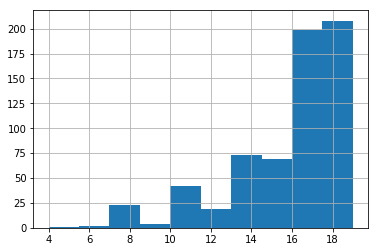

In [26]:
training_data_df[BEST_EPOCH].hist()

In [27]:
training_data_df[TOTAL_DURATION].describe()

count     640.000000
mean     1858.160938
std       502.743258
min      1289.000000
25%      1513.750000
50%      1863.500000
75%      2361.250000
max      2921.000000
Name: Total_Duration(s), dtype: float64

In [28]:
training_data_df.groupby([TRAINING_NUMBER]).describe()[TEST_F1_MEASURE].sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Training_Number,,,,,,,,
3,64.0,0.805276,0.011910,0.774334,0.800033,0.806911,0.813944,0.824247
5,64.0,0.803142,0.009385,0.783505,0.797817,0.805100,0.808702,0.822952
2,64.0,0.803097,0.011560,0.767589,0.793476,0.805369,0.811859,0.822145
7,64.0,0.803076,0.011714,0.769282,0.797352,0.805736,0.811843,0.822973
1,64.0,0.800789,0.012134,0.767568,0.795952,0.804692,0.809101,0.819461
9,64.0,0.800182,0.011442,0.771289,0.793414,0.802554,0.808022,0.819051
4,64.0,0.799963,0.010740,0.770358,0.793222,0.800703,0.808104,0.816562
6,64.0,0.799659,0.009716,0.777647,0.793682,0.800364,0.806539,0.817400
0,64.0,0.798603,0.011231,0.772601,0.791605,0.799086,0.807827,0.818658


In [29]:
elmo_average = get_seconds('00:43:40')/20
elmo_average

131.0

In [30]:
elmo_transformer_average = get_seconds('00:25:23')/20
elmo_transformer_average

76.15

In [31]:
(elmo_average + elmo_transformer_average)/2

103.575

In [32]:
elmo_average_bs64 = get_seconds('00:31:54')/20
elmo_average_bs64

95.7

In [33]:
print(get_seconds('00:01:39'))
print(get_seconds('00:03:15'))
print(get_seconds('00:03:15') - get_seconds('00:01:39'))

99.0
195.0
96.0


In [34]:
import pandas
import researchpy as rp
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

In [35]:
rp.summary_cont(training_data_df[TEST_F1_MEASURE])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Test_F1_Measure,640.0,0.801199,0.011245,0.000445,0.800326,0.802072


In [36]:
rp.summary_cont(training_data_df.groupby(MODEL))[TEST_F1_MEASURE]

,N,Mean,SD,SE,95% Conf.,Interval
Model,,,,,,
harem,160,0.805956,0.008103,0.000641,0.804701,0.807212
harem-ft,160,0.807557,0.007843,0.000620,0.806342,0.808772
harem-transformer-ft,160,0.798982,0.011186,0.000884,0.797249,0.800715
harem-transformer-pt,160,0.792301,0.010384,0.000821,0.790692,0.793910


In [37]:
rp.summary_cont(training_data_df.groupby(EMBEDDING))[TEST_F1_MEASURE]

,N,Mean,SD,SE,95% Conf.,Interval
Embedding,,,,,,
fasttext,160,0.799225,0.011209,0.000886,0.797488,0.800961
glove,160,0.804439,0.009257,0.000732,0.803004,0.805873
wang2vec,160,0.803304,0.010775,0.000852,0.801635,0.804974
word2vec,160,0.797829,0.012264,0.000970,0.795928,0.799729


In [38]:
rp.summary_cont(training_data_df.groupby(BATCH_SIZE))[TEST_F1_MEASURE]

,N,Mean,SD,SE,95% Conf.,Interval
Batch_Size,,,,,,
32,320,0.800503,0.011972,0.000669,0.799191,0.801815
64,320,0.801895,0.010440,0.000584,0.800751,0.803039


In [39]:
rp.summary_cont(training_data_df.groupby(ELMO_DROPOUT))[TEST_F1_MEASURE]

,N,Mean,SD,SE,95% Conf.,Interval
ELMo_Dropout,,,,,,
0,320,0.807192,0.008257,0.000462,0.806287,0.808097
0.5,320,0.795206,0.010634,0.000594,0.794041,0.796371


In [40]:
rp.summary_cont(training_data_df.groupby([MODEL,EMBEDDING]))[TEST_F1_MEASURE]

N      Mean        SD        SE  95% Conf.  \
Model                Embedding                                                
harem                fasttext   40  0.805614  0.008643  0.001367   0.802935   
                     glove      40  0.807065  0.007813  0.001235   0.804644   
                     wang2vec   40  0.808181  0.006608  0.001045   0.806133   
                     word2vec   40  0.802964  0.008520  0.001347   0.800324   
harem-ft             fasttext   40  0.805103  0.006950  0.001099   0.802949   
                     glove      40  0.810146  0.007260  0.001148   0.807896   
                     wang2vec   40  0.809809  0.007187  0.001136   0.807582   
                     word2vec   40  0.805171  0.008605  0.001361   0.802504   
harem-transformer-ft fasttext   40  0.796557  0.011036  0.001745   0.793137   
                     glove      40  0.803542  0.008384  0.001326   0.800944   
                     wang2vec   40  0.801613  0.010034  0.001586   0.798504   
                     word2vec   40  0.794216  0.012635  0.001998   0.790300   
harem-transformer-pt fasttext   40  0.789625  0.009398  0.001486   0.786712   
                     glove      40  0.797002  0.008204  0.001297   0.794459   
                     wang2vec   40  0.793613  0.010501  0.001660   0.790359   
                     word2vec   40  0.788964  0.011426  0.001807   0.785423   

                                Interval  
Model                Embedding            
harem                fasttext   0.808292  
                     glove      0.809486  
                     wang2vec   0.810229  
                     word2vec   0.805605  
harem-ft             fasttext   0.807257  
                     glove      0.812396  
                     wang2vec   0.812036  
                     word2vec   0.807837  
harem-transformer-ft fasttext   0.799977  
                     glove      0.806141  
                     wang2vec   0.804723  
                     word2vec   0.798132  
harem-transformer-pt fasttext   0.792537  
                     glove      0.799544  
                     wang2vec   0.796868  
                     word2vec   0.792505

In [41]:
print(TEST_F1_MEASURE, MODEL, EMBEDDING, BATCH_SIZE, ELMO_DROPOUT)

Test_F1_Measure Model Embedding Batch_Size ELMo_Dropout


In [42]:
# Fits the model with the interaction term
# This will also automatically include the main effects for each factor
model = ols('Test_F1_Measure ~ C(Model)*C(Embedding)*C(Batch_Size)*C(ELMo_Dropout)', training_data_df).fit()

# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 63, 576) =  20.053, p =  0.0000


In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Test_F1_Measure   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     20.05
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          2.32e-108
Time:                        11:41:08   Log-Likelihood:                 2336.1
No. Observations:                 640   AIC:                            -4544.
Df Residuals:                     576   BIC:                            -4259.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
========================================================================================================================================================================
                                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                0.8126      0.002    387.690      0.000       0.808       0.817
C(Model)[T.harem-ft]                                                                                    -0.0042      0.003     -1.432      0.153      -0.010       0.002
C(Model)[T.harem-transformer-ft]                                                                        -0.0061      0.003     -2.047      0.041      -0.012      -0.000
C(Model)[T.harem-transformer-pt]                                                                        -0.0183      0.003     -6.173      0.000      -0.024      -0.012
C(Embedding)[T.glove]                                                                                   -0.0024      0.003     -0.796      0.426      -0.008       0.003
C(Embedding)[T.wang2vec]                                                                                -0.0011      0.003     -0.364      0.716      -0.007       0.005
C(Embedding)[T.word2vec]                                                                                -0.0037      0.003     -1.265      0.206      -0.010       0.002
C(Batch_Size)[T.64]                                                                                     -0.0029      0.003     -0.986      0.324      -0.009       0.003
C(ELMo_Dropout)[T.0.5]                                                                                  -0.0136      0.003     -4.601      0.000      -0.019      -0.008
C(Model)[T.harem-ft]:C(Embedding)[T.glove]                                                               0.0082      0.004      1.965      0.050    5.36e-06       0.016
C(Model)[T.harem-transformer-ft]:C(Embedding)[T.glove]                                                   0.0053      0.004      1.259      0.209      -0.003       0.014
C(Model)[T.harem-transformer-pt]:C(Embedding)[T.glove]                                                   0.0105      0.004      2.513      0.012       0.002       0.019
C(Model)[T.harem-ft]:C(Embedding)[T.wang2vec]                                                            0.0077      0.004      1.848      0.065      -0.000       0.016
C(Model)[T.harem-transformer-ft]:C(Embedding)[T.wang2vec]                                                0.0020      0.004      0.467      0.640      -0.006       0.010
C(Model)[T.harem-transformer-pt]:C(Embedding)[T.wang2vec]                                                0.0074      0.004      1.761      0.079      -0.001       0.016
C(Model)[T.harem-ft]:C(Embedding)[T.word2

In [44]:
res = sm.stats.anova_lm(model, typ= 2)

In [45]:
res

,sum_sq,df,F,PR(>F)
C(Model),0.023543,3.0,178.638007,7.214416e-82
C(Embedding),0.004830,3.0,36.645293,1.099133e-21
C(Batch_Size),0.000310,1.0,7.063039,8.087476e-03
C(ELMo_Dropout),0.022986,1.0,523.235743,7.070118e-83
C(Model):C(Embedding),0.000657,9.0,1.662613,9.480037e-02
C(Model):C(Batch_Size),0.000266,3.0,2.015914,1.105724e-01
C(Embedding):C(Batch_Size),0.000178,3.0,1.350072,2.572259e-01
C(Model):C(ELMo_Dropout),0.001280,3.0,9.714549,2.915060e-06
C(Embedding):C(ELMo_Dropout),0.000668,3.0,5.072042,1.789831e-03
C(Batch_Size):C(ELMo_Dropout),0.000090,1.0,2.052183,1.525306e-01


In [46]:
# Fits the model with the interaction term
# This will also automatically include the main effects for each factor
model = ols('Test_F1_Measure ~ C(Model)*C(Embedding)', training_data_df).fit()

# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 15, 624) =  23.325, p =  0.0000


In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Test_F1_Measure   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     23.33
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           6.09e-51
Time:                        11:41:08   Log-Likelihood:                 2107.0
No. Observations:                 640   AIC:                            -4182.
Df Residuals:                     624   BIC:                            -4111.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                     0.8056      0.001    559.357      0.000       0.803       0.808
C(Model)[T.harem-ft]                                         -0.0005      0.002     -0.251      0.802      -0.005       0.003
C(Model)[T.harem-transformer-ft]                             -0.0091      0.002     -4.447      0.000      -0.013      -0.005
C(Model)[T.harem-transformer-pt]                             -0.0160      0.002     -7.850      0.000      -0.020      -0.012
C(Embedding)[T.glove]                                         0.0015      0.002      0.713      0.476      -0.003       0.005
C(Embedding)[T.wang2vec]                                      0.0026      0.002      1.260      0.208      -0.001       0.007
C(Embedding)[T.word2vec]                                     -0.0026      0.002     -1.301      0.194      -0.007       0.001
C(Model)[T.harem-ft]:C(Embedding)[T.glove]                    0.0036      0.003      1.247      0.213      -0.002       0.009
C(Model)[T.harem-transformer-ft]:C(Embedding)[T.glove]        0.0055      0.003      1.921      0.055      -0.000       0.011
C(Model)[T.harem-transformer-pt]:C(Embedding)[T.glove]        0.0059      0.003      2.057      0.040       0.000       0.012
C(Model)[T.harem-ft]:C(Embedding)[T.wang2vec]                 0.0021      0.003      0.742      0.458      -0.004       0.008
C(Model)[T.harem-transformer-ft]:C(Embedding)[T.wang2vec]     0.0025      0.003      0.864      0.388      -0.003       0.008
C(Model)[T.harem-transformer-pt]:C(Embedding)[T.wang2vec]     0.0014      0.003      0.493      0.622      -0.004       0.007
C(Model)[T.harem-ft]:C(Embedding)[T.word2vec]                 0.0027      0.003      0.943      0.346      -0.003       0.008
C(Model)[T.harem-transformer-ft]:C(Embedding)[T.word2vec]     0.0003      0.003      0.107      0.915      -0.005       0.006
C(Model)[T.harem-transformer-pt]:C(Embedding)[T.word2vec]     0.0020      0.003      0.691      0.490      -0.004       0.008
==============================================================================
Omnibus:                        5.889   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.948
Skew:                          -0.235   Prob(JB):                       0.0511
Kurtosis:                       2.958   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
sm.stats.anova_lm(model, typ= 2)

,sum_sq,df,F,PR(>F)
C(Model),0.023543,3.0,94.582095,1.826957e-50
C(Embedding),0.004830,3.0,19.402302,4.882065e-12
C(Model):C(Embedding),0.000657,9.0,0.880291,5.425530e-01
Residual,0.051775,624.0,NaN,NaN


In [49]:
# Fits the model with the interaction term
# This will also automatically include the main effects for each factor
model = ols('Test_F1_Measure ~ C(Model)+C(Embedding)', training_data_df).fit()

# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 6, 633) =  57.089, p =  0.0000


In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Test_F1_Measure   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     57.09
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           2.23e-56
Time:                        11:41:08   Log-Likelihood:                 2103.0
No. Observations:                 640   AIC:                            -4192.
Df Residuals:                     633   BIC:                            -4161.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.8040      0.001    844.675      0.000       0.802       0.806
C(Model)[T.harem-ft]                 0.0016      0.001      1.573      0.116      -0.000       0.004
C(Model)[T.harem-transformer-ft]    -0.0070      0.001     -6.854      0.000      -0.009      -0.005
C(Model)[T.harem-transformer-pt]    -0.0137      0.001    -13.420      0.000      -0.016      -0.012
C(Embedding)[T.glove]                0.0052      0.001      5.124      0.000       0.003       0.007
C(Embedding)[T.wang2vec]             0.0041      0.001      4.009      0.000       0.002       0.006
C(Embedding)[T.word2vec]            -0.0014      0.001     -1.372      0.171      -0.003       0.001
==============================================================================
Omnibus:                        7.365   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.401
Skew:                          -0.263   Prob(JB):                       0.0247
Kurtosis:                       3.010   Cond. No.                         5.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
res = sm.stats.anova_lm(model, typ=2)
res

,sum_sq,df,F,PR(>F)
C(Model),0.023543,3.0,94.743351,1.175349e-50
C(Embedding),0.004830,3.0,19.435382,4.592073e-12
Residual,0.052432,633.0,NaN,NaN


In [52]:
# Calculating effect size
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(res)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(Model),0.023543,0.007848,3.0,94.743351,1.175349e-50,0.291358,0.287987
C(Embedding),0.004830,0.001610,3.0,19.435382,4.592073e-12,0.059768,0.056635
Residual,0.052432,0.000083,633.0,NaN,NaN,NaN,NaN


In [53]:
mc = statsmodels.stats.multicomp.MultiComparison(training_data_df[TEST_F1_MEASURE], training_data_df[MODEL])
mc_results = mc.tukeyhsd()
print(mc_results)

            Multiple Comparison of Means - Tukey HSD,FWER=0.05           
       group1               group2        meandiff  lower   upper  reject
-------------------------------------------------------------------------
       harem               harem-ft        0.0016  -0.0011  0.0043 False 
       harem         harem-transformer-ft  -0.007  -0.0097 -0.0042  True 
       harem         harem-transformer-pt -0.0137  -0.0164 -0.0109  True 
      harem-ft       harem-transformer-ft -0.0086  -0.0113 -0.0058  True 
      harem-ft       harem-transformer-pt -0.0153   -0.018 -0.0125  True 
harem-transformer-ft harem-transformer-pt -0.0067  -0.0094 -0.0039  True 
-------------------------------------------------------------------------


In [54]:
mc = statsmodels.stats.multicomp.MultiComparison(training_data_df[TEST_F1_MEASURE], training_data_df[EMBEDDING])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2  meandiff  lower   upper  reject
-------------------------------------------------
fasttext  glove    0.0052   0.0021  0.0084  True 
fasttext wang2vec  0.0041   0.0009  0.0072  True 
fasttext word2vec -0.0014  -0.0045  0.0018 False 
 glove   wang2vec -0.0011  -0.0043  0.002  False 
 glove   word2vec -0.0066  -0.0098 -0.0035  True 
wang2vec word2vec -0.0055  -0.0086 -0.0023  True 
-------------------------------------------------


In [55]:
mc = statsmodels.stats.multicomp.MultiComparison(training_data_df[TEST_F1_MEASURE], training_data_df[ELMO_DROPOUT])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0     0.5    -0.012  -0.0135 -0.0105  True 
---------------------------------------------


In [56]:
mc = statsmodels.stats.multicomp.MultiComparison(training_data_df[TEST_F1_MEASURE], training_data_df[BATCH_SIZE])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  32     64    0.0014  -0.0004 0.0031 False 
--------------------------------------------
